In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import math
from rasterio.plot import show
from rasterio.enums import Resampling
from PIL import Image

In [2]:
drone_file_path = 'drone_image_example.tif'
drone_dataset = rasterio.open(drone_file_path)

In [3]:
# Get the bounds(longitudes and latitudes) of the GeoTIFF
drone_bounds = drone_dataset.bounds
print("Bounds:", drone_bounds)

# Get the coordinate reference system (CRS) e.g.EPSG:4326, which means the bounds are recorded in longitudes and latitudes
drone_crs = drone_dataset.crs
print("CRS:", drone_crs)

Bounds: BoundingBox(left=-77.16349906202836, bottom=17.818361485870938, right=-77.16284016451637, top=17.824140865870937)
CRS: EPSG:4326


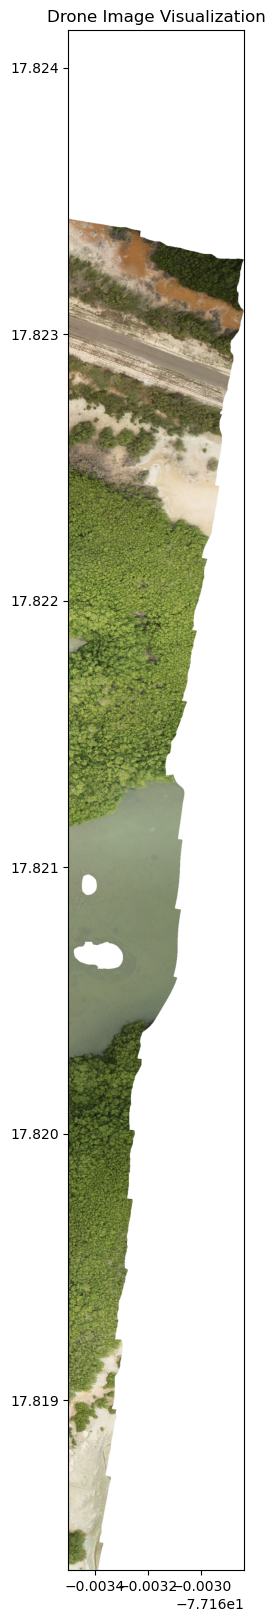

In [4]:
# Plotting the raster data
fig, ax = plt.subplots(figsize=(20, 20))
show(drone_dataset, ax=ax)
plt.title("Drone Image Visualization")
plt.show()

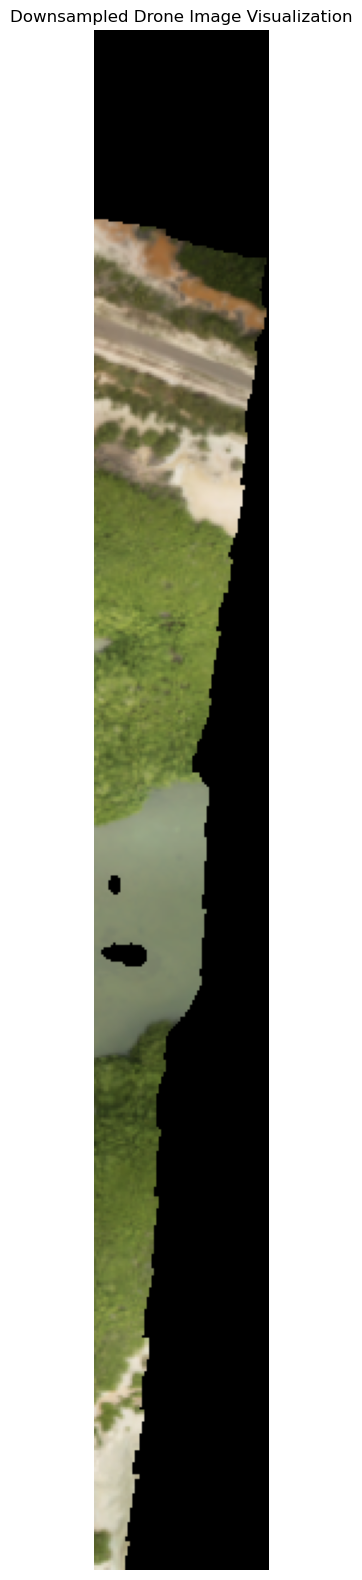

In [5]:
# Define file path
file_path = "drone_image_example.tif"

# Open the TIFF file and extract metadata
with rasterio.open(file_path) as dataset:
    # Extract the original resolution in degrees per pixel
    original_resolution_x = dataset.transform[0]  # X resolution in degrees per pixel
    original_resolution_y = -dataset.transform[4]  # Y resolution in degrees per pixel

    # Convert degrees per pixel to meters per pixel (approximation using WGS84 at equator)
    meters_per_degree = 111320  # Approximate meters per degree at the equator
    resolution_x_m = original_resolution_x * meters_per_degree
    resolution_y_m = original_resolution_y * meters_per_degree

    # Compute the downsampling scale factor to achieve 1m per pixel resolution
    scale_x = resolution_x_m / 1.0  # Target resolution is 1 meter per pixel
    scale_y = resolution_y_m / 1.0

    # Compute the new image dimensions (reducing size)
    new_width = max(1, int(dataset.width * scale_x))  # Reduce pixel count
    new_height = max(1, int(dataset.height * scale_y))

    # Update metadata for the final downsampled image
    new_transform = dataset.transform * dataset.transform.scale(
        (dataset.width / new_width), (dataset.height / new_height)
    )
    profile = dataset.profile.copy()
    profile.update({"height": new_height, "width": new_width, "transform": new_transform})

    # Read and resample the image to 1m/px
    data_downsampled = dataset.read(out_shape=(dataset.count, new_height, new_width), resampling=Resampling.bilinear)

    # Identify white mask (assuming white is maximum intensity in all bands)
    white_mask = np.all(dataset.read() == 255, axis=0)

    # Apply the white mask to the resampled data
    for band in range(data_downsampled.shape[0]):
        data_downsampled[band][white_mask[:new_height, :new_width]] = 255

    # Save the final downsampled image
    final_output_path = "drone_image_downsampled.tif"
    with rasterio.open(final_output_path, "w", **profile) as dst:
        dst.write(data_downsampled)

# Display the downsampled image
with rasterio.open(final_output_path) as dataset:
    image_preview = dataset.read([1, 2, 3])  # Read RGB bands (assuming it's an RGB image)

# Normalize for display
image_preview = np.moveaxis(image_preview, 0, -1)  # Convert to (H, W, C)

# Plot the image
plt.figure(figsize=(20, 20))
plt.imshow(image_preview)
plt.axis("off")
plt.title("Downsampled Drone Image Visualization")
plt.show()

In [6]:
satellite_file_path = 'satellite_image_example.tif'
satellite_dataset = rasterio.open(satellite_file_path)

In [7]:
# Get the bounds(longitudes and latitudes) of the GeoTIFF
satellite_bounds = satellite_dataset.bounds
print("Bounds:", satellite_bounds)

# Get the coordinate reference system (CRS) e.g.EPSG:4326, which means the bounds are recorded in longitudes and latitudes
satellite_crs = satellite_dataset.crs
print("CRS:", satellite_crs)

Bounds: BoundingBox(left=-77.16357610682707, bottom=17.818353155095945, right=-77.16276762307136, top=17.82410237291431)
CRS: EPSG:4326


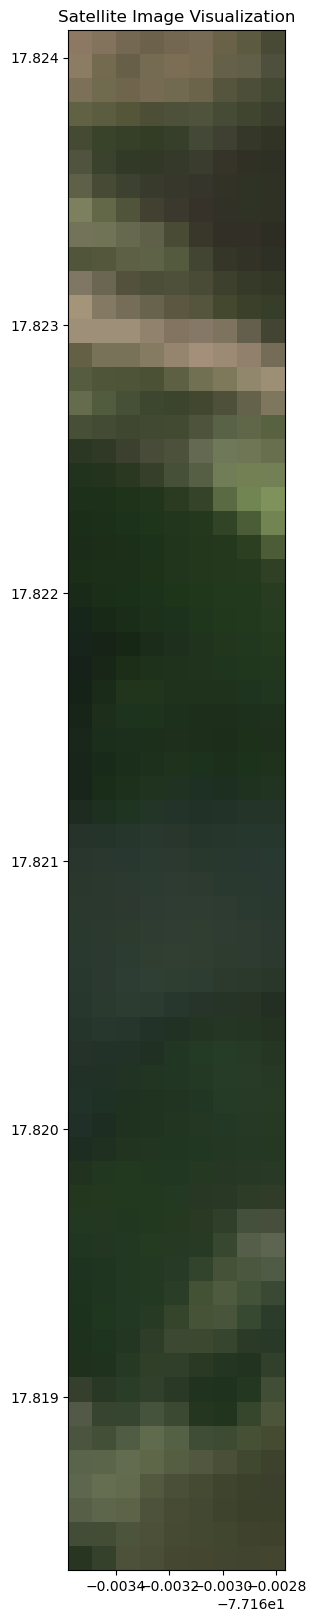

In [8]:
# Plotting the raster data
fig, ax = plt.subplots(figsize=(20, 20))
show(satellite_dataset, ax=ax)
plt.title("Satellite Image Visualization")
plt.show()

In [9]:
satellite_image_example = Image.open(satellite_file_path)
rgb_satellite_image_example = satellite_image_example.convert("RGB")
rgb_matrix_satellite_image_example = np.array(rgb_satellite_image_example)
print(rgb_matrix_satellite_image_example)
print(rgb_matrix_satellite_image_example.shape) # (height, width, 3 which is the number of color channels)

[[[140 120  99]
  [131 115  92]
  [117 104  83]
  ...
  [105  98  73]
  [ 93  90  66]
  [ 73  74  53]]

 [[141 124 100]
  [116 106  80]
  [104  95  73]
  ...
  [101  97  72]
  [ 97  95  71]
  [ 78  79  60]]

 [[125 112  89]
  [112 106  78]
  [110 101  76]
  ...
  [ 85  85  62]
  [ 76  78  57]
  [ 67  72  51]]

 ...

 [[ 87  95  71]
  [ 93 101  74]
  [ 92  99  71]
  ...
  [ 61  67  44]
  [ 59  64  43]
  [ 59  64  43]]

 [[ 67  76  55]
  [ 67  77  53]
  [ 76  84  59]
  ...
  [ 65  70  46]
  [ 63  67  45]
  [ 62  66  45]]

 [[ 40  53  33]
  [ 54  65  43]
  [ 77  81  58]
  ...
  [ 66  69  47]
  [ 65  68  47]
  [ 67  69  47]]]
(64, 9, 3)


In [ ]:
with rasterio.open("satellite_image_jamaica.tif") as src:
    rgb_matrix_satellite_image = src.read([1, 2, 3])  # Read the first three bands as RGB

# Reshape the array to (height, width, 3)
rgb_matrix_satellite_image = np.transpose(rgb_matrix_satellite_image, (1, 2, 0))
np.save("rgb_matrix_satellite_image_jamaica.npy", rgb_matrix_satellite_image)
print(rgb_matrix_satellite_image.shape)